In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1635


<Axes: xlabel='Time'>

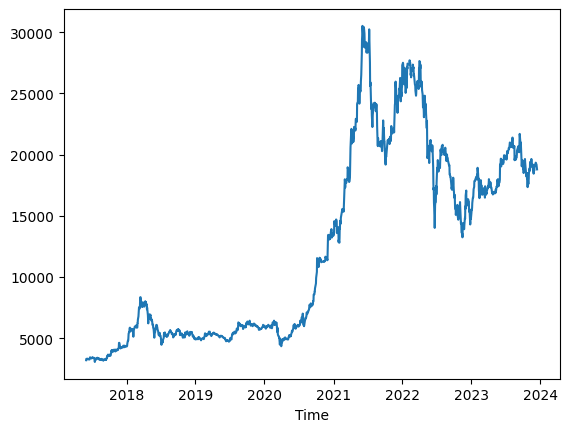

In [2]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [5]:
# Preprocessing
df = VIB['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1635)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2,Lag3
2,2017-06-05,3290,2,1.0,0.0
3,2017-06-06,3320,3,2.0,1.0
4,2017-06-07,3340,4,3.0,2.0
5,2017-06-08,3310,5,4.0,3.0
6,2017-06-09,3290,6,5.0,4.0
...,...,...,...,...,...
1630,2023-12-11,19200,1630,1629.0,1628.0
1631,2023-12-12,19200,1631,1630.0,1629.0
1632,2023-12-13,19050,1632,1631.0,1630.0
1633,2023-12-14,18900,1633,1632.0,1631.0


In [6]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [7]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2'], train_data['Lag3']]).reshape(-1, 3)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2'], test_data['Lag3']]).reshape(-1, 3)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([10513.51976651, 10535.50268343, 10557.48560034, 10579.46851726,
       10601.45143418, 10623.4343511 , 10645.41726801, 10667.40018493,
       10689.38310185, 10711.36601877, 10733.34893568, 10755.3318526 ,
       10777.31476952, 10799.29768644, 10821.28060335, 10843.26352027,
       10865.24643719, 10887.22935411, 10909.21227102, 10931.19518794,
       10953.17810486, 10975.16102178, 10997.1439387 , 11019.12685561,
       11041.10977253, 11063.09268945, 11085.07560637, 11107.05852328,
       11129.0414402 , 11151.02435712, 11173.00727404, 11194.99019095,
       11216.97310787, 11238.95602479, 11260.93894171, 11282.92185862,
       11304.90477554, 11326.88769246, 11348.87060938, 11370.85352629,
       11392.83644321, 11414.81936013, 11436.80227705, 11458.78519397,
       11480.76811088, 11502.7510278 , 11524.73394472, 11546.71686164,
       11568.69977855, 11590.68269547, 11612.66561239, 11634.64852931,
       11656.63144622, 11678.61436314, 11700.59728006, 11722.58019698,
      

In [9]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))
range_arr_3 = np.array(range(last_index-1, last_index+59))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2,
                          range_arr_3]).reshape(-1, 3)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[15298.46801558 15320.4509325  15342.43384941 15364.41676633
 15386.39968325 15408.38260017 15430.36551708 15452.348434
 15474.33135092 15496.31426784 15518.29718475 15540.28010167
 15562.26301859 15584.24593551 15606.22885242 15628.21176934
 15650.19468626 15672.17760318 15694.1605201  15716.14343701
 15291.14037661 15313.12329352 15335.10621044 15357.08912736
 15379.07204428 15401.05496119 15423.03787811 15445.02079503
 15467.00371195 15488.98662886 15510.96954578 15532.9524627
 15554.93537962 15576.91829653 15598.90121345 15620.88413037
 15642.86704729 15664.8499642  15686.83288112 15708.81579804
 15283.81273763 15305.79565455 15327.77857147 15349.76148839
 15371.7444053  15393.72732222 15415.71023914 15437.69315606
 15459.67607297 15481.65898989 15503.64190681 15525.62482373
 15547.60774064 15569.59065756 15591.57357448 15613.5564914
 15635.53940831 15657.52232523 15679.50524215 15701.48815907]


In [12]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 8942.644666625865
Testing MAPE: 35.43043186636389
Testing MAE: 7822.503534355307
MSLR:  0.26674259977249826


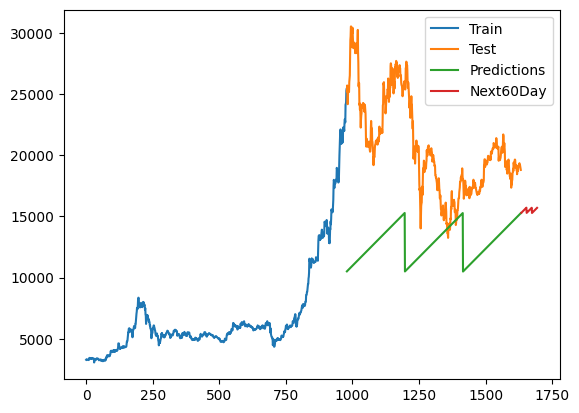

In [11]:
train_range = range(train_size)
test_range = range(train_size, train_size+test_size+1)

# 8.Visualize the result
plt.plot(train_range, train_data['Close'])
plt.plot(test_range, test_data['Close'])
plt.plot(test_range, y_pred)
plt.plot(range_arr_1,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()